In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("DatosSeguros.csv")


In [9]:
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


In [12]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


In [16]:
edad = df.sort_values("edad")
edad.tail()


,edad,sexo,imc,hijos,fumador,region,valor_seguro
536,64,M,40.48,0,no,Cundinamarca,13831.11520
64,64,M,24.70,1,no,Antioquia,30166.61817
1248,64,M,36.96,2,yes,Cundinamarca,49577.66240
422,64,M,33.88,0,yes,Cundinamarca,46889.26120
637,64,M,38.19,0,no,Boyaca,14410.93210


In [20]:
rangos = [17,28,38,48,58,68]
nombre_rango = ["A","B","C","D","E"]
df["rango_edad"]=pd.cut(df["edad"],rangos,labels=nombre_rango)
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro,rango_edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B


In [21]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


array([[<AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'imc'}>],
       [<AxesSubplot:title={'center':'hijos'}>,
        <AxesSubplot:title={'center':'valor_seguro'}>]], dtype=object)

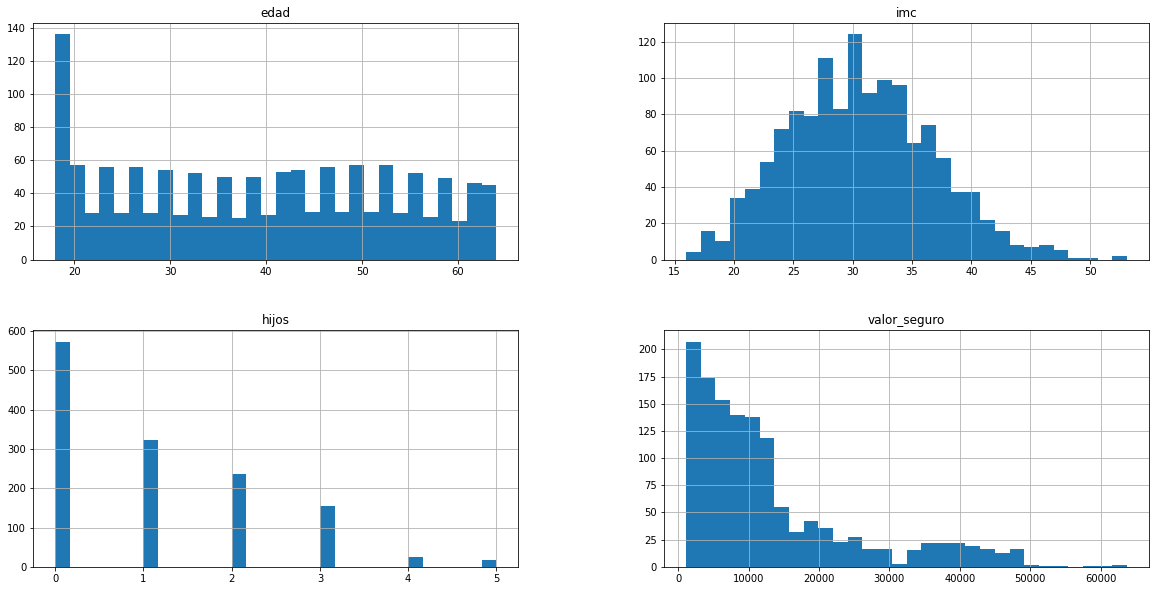

In [22]:
df.hist(bins=30,figsize=(20,10))

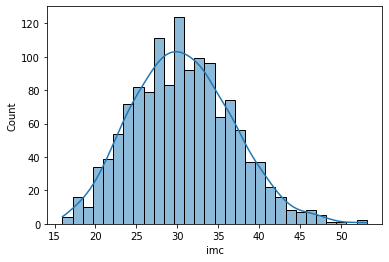

In [25]:
sns.histplot(df.imc,bins=30,kde=True)
plt.show()

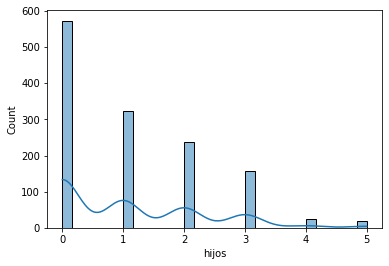

In [26]:
sns.histplot(df.hijos,bins=30,kde=True)
plt.show()

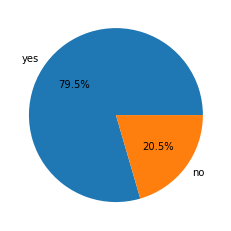

In [28]:
fumon = df["fumador"].groupby(df["fumador"]).count()
si_no = ["yes","no"]
plt.pie(fumon,labels=si_no,autopct='%.1f%%')
plt.show()

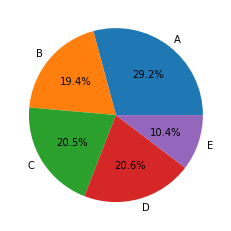

In [30]:
total_rango_edad = df["rango_edad"].groupby(df["rango_edad"]).count()
labels = ["A","B","C","D","E"]
plt.pie(total_rango_edad,labels=labels,autopct='%.1f%%')
plt.show()

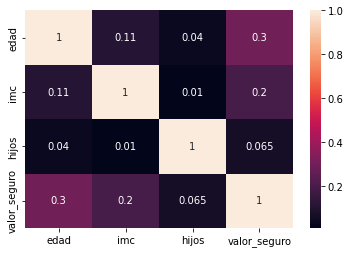

In [31]:
correlacion = df.corr()
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)
plt.show()

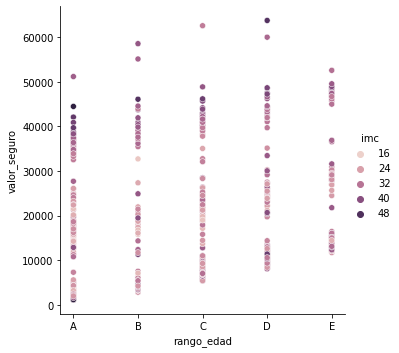

In [32]:
sns.relplot(x="rango_edad",y="valor_seguro",hue="imc",data=df)
plt.show()

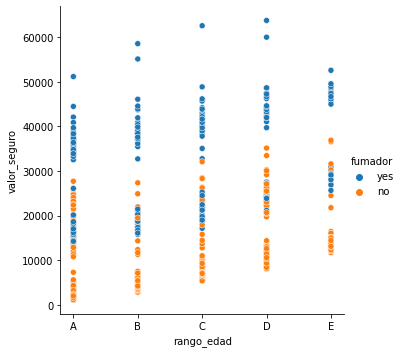

In [33]:
sns.relplot(x="rango_edad",y="valor_seguro",hue="fumador",data=df)
plt.show()

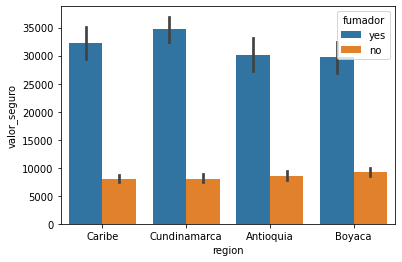

In [34]:
sns.barplot(data=df,x="region",y="valor_seguro",hue="fumador")
plt.show()

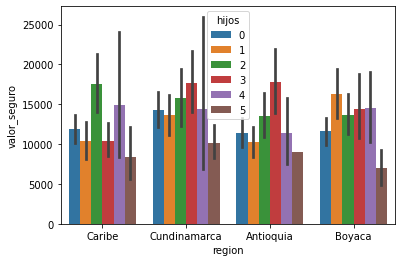

In [38]:
sns.barplot(data=df,x="region",y="valor_seguro",hue="hijos")
plt.show()

In [36]:
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro,rango_edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B
